In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df

,File,Subjects,Keywords,Cited-by-count
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0
3,202202862.json,PHYS,NaN,0.0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0
...,...,...,...,...
20211,201802218.json,COMP,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,0.0
20212,201800225.json,MULT,NaN,27.0
20213,201802648.json,MEDI,Rehabilitation;Transcranial direct current sti...,7.0
20214,201800675.json,VETE,Canine cognitive dysfunction syndrome;Thailand...,1.0


In [3]:
df2 = df.dropna()
df2['Subjects']

0        AGRI;VETE;BIOC
1                  MEDI
2                  NEUR
4                  MEDI
5                  AGRI
              ...      
20208         PSYC;SOCI
20210              MEDI
20211              COMP
20213              MEDI
20214              VETE
Name: Subjects, Length: 16408, dtype: object

In [4]:


# Example data (replace with your actual DataFrame)
data = {
    "Subjects": df2['Subjects']}
df3 = pd.DataFrame(data)

# Step 1: Split the Subjects column into individual categories
df3['Subjects_split'] = df3['Subjects'].str.split(';')

# Step 2: Explode the lists into separate rows
exploded_df = df3.explode('Subjects_split')

# Step 3: Create dummy variables for the exploded column
dummy_df = pd.get_dummies(exploded_df['Subjects_split'])

# Step 4: Aggregate the dummy variables back to the original DataFrame
# Group by the original DataFrame's index
dummy_df = dummy_df.groupby(exploded_df.index).sum()

# Step 5: Combine the dummy-coded columns with the original DataFrame
df3 = pd.concat([df3, dummy_df], axis=1)

# Drop the intermediate column if you no longer need it
df3 = df3.drop(columns=['Subjects_split'])

df3

,Subjects,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,AGRI;VETE;BIOC,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,NEUR,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,AGRI,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,PSYC;SOCI,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
20210,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
20211,COMP,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20213,MEDI,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [5]:
df4 = pd.concat([df2,df3.drop(columns=['Subjects'])], axis=1)

In [6]:
df4.head()

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df5= pd.DataFrame(df4['Keywords'])

df5

,Keywords
0,Microencapsulation;Basil Oil;Performance;Broil...
1,care delivery;neurocritical care;resources;COV...
2,Partial Least Squares (PLS) analysis;neurocogn...
4,Cardiorespiratory function;Bra;Metabolism
5,tropical rainforest;Ichneumonoidea;insect-frui...
...,...
20208,National prevalence;Intimate partner violence;...
20210,therapeutic hypothermia;neurological prognosti...
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...
20213,Rehabilitation;Transcranial direct current sti...


In [8]:
from gensim.models import Word2Vec
import numpy as np


In [9]:

# Step 1: Split sentences into words using semicolon
df5['Tokenized'] = df5["Keywords"].apply(lambda x: x.split(';'))

df5



,Keywords,Tokenized
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]"
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f..."
...,...,...
20208,National prevalence;Intimate partner violence;...,"[National prevalence, Intimate partner violenc..."
20210,therapeutic hypothermia;neurological prognosti...,"[therapeutic hypothermia, neurological prognos..."
20211,Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...,"[Landsat 8, NDVI, Sentinel-2, Remote sensing, ..."
20213,Rehabilitation;Transcranial direct current sti...,"[Rehabilitation, Transcranial direct current s..."


In [10]:

# Step 2: Train Word2Vec model
# Create a Word2Vec model using the tokenized column
w2v_model = Word2Vec(sentences=df5['Tokenized'], vector_size=5, window=5, min_count=1, workers=4)

# Step 3: Convert words to vectors
def row_to_vector(row, model):
    vectors = []
    for word in row:
        if word in model.wv:
            vectors.append(model.wv[word])
    if vectors:
        # Average the vectors for the row
        return np.mean(vectors, axis=0)
    else:
        # Return a zero vector if no words were in the vocabulary
        return np.zeros(model.vector_size)

df5['Vector'] = df5['Tokenized'].apply(lambda x: row_to_vector(x, w2v_model))

# Step 4: Save or use the vectors
print(df5[['Keywords', 'Vector']])


                                                Keywords  \
0      Microencapsulation;Basil Oil;Performance;Broil...   
1      care delivery;neurocritical care;resources;COV...   
2      Partial Least Squares (PLS) analysis;neurocogn...   
4              Cardiorespiratory function;Bra;Metabolism   
5      tropical rainforest;Ichneumonoidea;insect-frui...   
...                                                  ...   
20208  National prevalence;Intimate partner violence;...   
20210  therapeutic hypothermia;neurological prognosti...   
20211  Landsat 8;NDVI;Sentinel-2;Remote sensing;Actua...   
20213  Rehabilitation;Transcranial direct current sti...   
20214  Canine cognitive dysfunction syndrome;Thailand...   

                                                  Vector  
0      [0.014427331, -0.060901374, 0.024829054, 0.046...  
1      [-0.062339485, 0.020881334, 0.10787191, 0.0329...  
2      [-0.0742344, 0.095312074, -0.0397093, -0.04647...  
4      [-0.035525713, 0.12535737, -0.009803

In [11]:

df5.head()

,Keywords,Tokenized,Vector
0,Microencapsulation;Basil Oil;Performance;Broil...,"[Microencapsulation, Basil Oil, Performance, B...","[0.014427331, -0.060901374, 0.024829054, 0.046..."
1,care delivery;neurocritical care;resources;COV...,"[care delivery, neurocritical care, resources,...","[-0.062339485, 0.020881334, 0.10787191, 0.0329..."
2,Partial Least Squares (PLS) analysis;neurocogn...,"[Partial Least Squares (PLS) analysis, neuroco...","[-0.0742344, 0.095312074, -0.0397093, -0.04647..."
4,Cardiorespiratory function;Bra;Metabolism,"[Cardiorespiratory function, Bra, Metabolism]","[-0.035525713, 0.12535737, -0.009803516, 0.060..."
5,tropical rainforest;Ichneumonoidea;insect-frui...,"[tropical rainforest, Ichneumonoidea, insect-f...","[0.03714951, 0.10513674, 0.10328664, -0.005273..."


In [12]:
df5["Vector"].iloc[0].mean()

0.009951451

In [13]:
df5['Mean'] = df5['Vector'].apply(lambda x: x.mean())
df5['Vector'].head()

0    [0.014427331, -0.060901374, 0.024829054, 0.046...
1    [-0.062339485, 0.020881334, 0.10787191, 0.0329...
2    [-0.0742344, 0.095312074, -0.0397093, -0.04647...
4    [-0.035525713, 0.12535737, -0.009803516, 0.060...
5    [0.03714951, 0.10513674, 0.10328664, -0.005273...
Name: Vector, dtype: object

In [14]:
df6 = pd.concat([df4,df5['Mean']], axis=1)

In [15]:

df6.head()


,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.009951
1,202202531.json,MEDI,care delivery;neurocritical care;resources;COV...,2.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.015469
2,202203770.json,NEUR,Partial Least Squares (PLS) analysis;neurocogn...,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.014285
4,202203320.json,MEDI,Cardiorespiratory function;Bra;Metabolism,0.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.020591
5,202201608.json,AGRI,tropical rainforest;Ichneumonoidea;insect-frui...,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.050330


In [16]:
df6.loc[df6['Subjects']=="COMP"].sort_values(by="Mean")

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Mean
16241,202001486.json,COMP,Flight Attendant;Personal Tracking Device;Imag...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.059984
10562,202101000.json,COMP,exergaming;Immersive virtual reality;engagemen...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.058797
12647,202100788.json,COMP,Imbalanced problem;Undersampling;Mass ratio va...,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.057634
3417,202202114.json,COMP,conveyor belt sushi;smart billing;object detec...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.056422
6314,202301934.json,COMP,two-stage models;language models;misspelling d...,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.054189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15352,202001847.json,COMP,Ensemble approach;Distributive Matrix;Collabor...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.058648
12739,202101727.json,COMP,Music Streaming;Personality Trait;Music Prefer...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.058703
8518,201900724.json,COMP,Bayesian flexible mixture model;Recommender sy...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.058747
9899,201900063.json,COMP,Multiclass Classification;Text Classification;...,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.070194


In [17]:
df6 = df5.drop(columns="Mean", inplace=True)

In [18]:
df4.head(1)

,File,Subjects,Keywords,Cited-by-count,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,...,MATH,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE
0,202202161.json,AGRI;VETE;BIOC,Microencapsulation;Basil Oil;Performance;Broil...,2.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df6 = df5.drop(columns=['Tokenized', 'Keywords'])

In [20]:
df6

,Vector
0,"[0.014427331, -0.060901374, 0.024829054, 0.046..."
1,"[-0.062339485, 0.020881334, 0.10787191, 0.0329..."
2,"[-0.0742344, 0.095312074, -0.0397093, -0.04647..."
4,"[-0.035525713, 0.12535737, -0.009803516, 0.060..."
5,"[0.03714951, 0.10513674, 0.10328664, -0.005273..."
...,...
20208,"[-0.028004458, -0.05601734, 0.16212772, 0.0974..."
20210,"[0.039180238, -0.008645768, -0.117816456, 0.03..."
20211,"[-0.02752564, 0.0104097, 0.019080536, -0.03350..."
20213,"[-0.023589164, 0.10799729, -0.036101125, 0.054..."


In [21]:
df7 = pd.concat([df4,df6], axis=1)
X = df7.drop(columns=['File','Subjects','Keywords','Cited-by-count'])
X.head()

,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,MEDI,MULT,NEUR,NURS,PHAR,PHYS,PSYC,SOCI,VETE,Vector
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,"[0.014427331, -0.060901374, 0.024829054, 0.046..."
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[-0.062339485, 0.020881334, 0.10787191, 0.0329..."
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,"[-0.0742344, 0.095312074, -0.0397093, -0.04647..."
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,"[-0.035525713, 0.12535737, -0.009803516, 0.060..."
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.03714951, 0.10513674, 0.10328664, -0.005273..."


In [22]:
vector_expanded = pd.DataFrame(X['Vector'].tolist(), index=X.index)
vector_expanded.columns = [f'Vector_{i}' for i in range(vector_expanded.shape[1])]
df_expanded = pd.concat([X.drop(columns=['Vector']), vector_expanded], axis=1)
df_expanded


,AGRI,ARTS,BIOC,BUSI,CENG,CHEM,COMP,DECI,DENT,EART,...,PHAR,PHYS,PSYC,SOCI,VETE,Vector_0,Vector_1,Vector_2,Vector_3,Vector_4
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.014427,-0.060901,0.024829,0.046230,0.025172
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.062339,0.020881,0.107872,0.032941,-0.022008
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.074234,0.095312,-0.039709,-0.046475,-0.006319
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.035526,0.125357,-0.009804,0.060674,-0.037745
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.037150,0.105137,0.103287,-0.005273,0.011350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20208,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,-0.028004,-0.056017,0.162128,0.097500,-0.063215
20210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.039180,-0.008646,-0.117816,0.036086,-0.036401
20211,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.027526,0.010410,0.019081,-0.033508,-0.040691
20213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.023589,0.107997,-0.036101,0.054793,-0.055357


In [28]:
df_expanded.to_csv('out.csv')

In [29]:
df_expanded.columns

Index(['AGRI', 'ARTS', 'BIOC', 'BUSI', 'CENG', 'CHEM', 'COMP', 'DECI', 'DENT',
       'EART', 'ECON', 'ENER', 'ENGI', 'ENVI', 'HEAL', 'IMMU', 'MATE', 'MATH',
       'MEDI', 'MULT', 'NEUR', 'NURS', 'PHAR', 'PHYS', 'PSYC', 'SOCI', 'VETE',
       'Vector_0', 'Vector_1', 'Vector_2', 'Vector_3', 'Vector_4'],
      dtype='object')

In [24]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, algorithm='brute')
neigh.fit(df_expanded)

NearestNeighbors(algorithm='brute')

Distances to neighbors: [[1.19209290e-07 1.53381223e+00 2.83263460e+00 2.83621979e+00
  3.10426597e+00]]
Indices of neighbors: [[    0  3629 11137 11970  4811]]


/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_6832/2778207331.py:18: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_6832/2778207331.py:19: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
/var/folders/h3/pwlyvdxs71v5yn4z60q6qlv40000gn/T/ipykernel_6832/2778207331.py:20: RuntimeWarning: invalid value encountered in log1p
  plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)


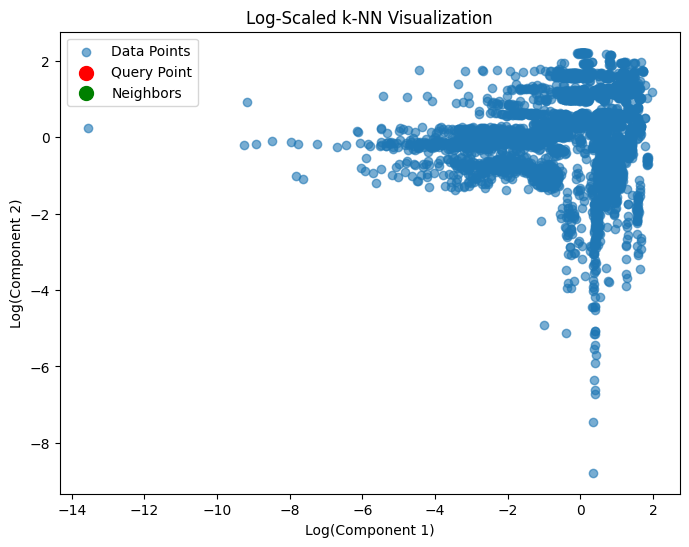

In [25]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_expanded)
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.figure(figsize=(8, 6))
plt.scatter(np.log1p(features_2d[:, 0]), np.log1p(features_2d[:, 1]), alpha=0.6, label="Data Points")
plt.scatter(np.log1p(query_point[0]), np.log1p(query_point[1]), color='red', label='Query Point', s=100)
plt.scatter(np.log1p(neighbors[:, 0]), np.log1p(neighbors[:, 1]), color='green', label='Neighbors', s=100)
plt.title('Log-Scaled k-NN Visualization')
plt.xlabel('Log(Component 1)')
plt.ylabel('Log(Component 2)')
plt.legend()
plt.show()

Distances to neighbors: [[8.42936970e-08 1.95228004e+00 2.11515804e+00 2.50022794e+00
  2.56344587e+00]]
Indices of neighbors: [[  0  59  67 331  65]]


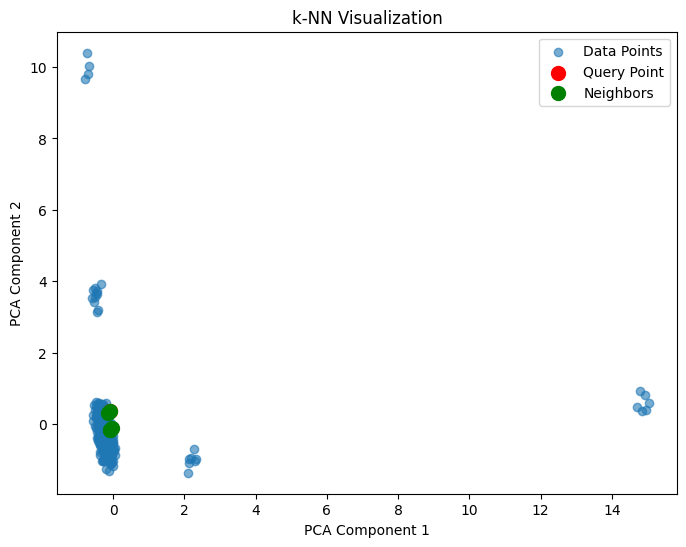

In [30]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


features_scaled = scaler.fit_transform(df_expanded.loc[df_expanded['DENT'] == 1])
n_neighbors = 5
knn = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute')
knn.fit(features_scaled)
distances, indices = knn.kneighbors([features_scaled[0]])
print("Distances to neighbors:", distances)
print("Indices of neighbors:", indices)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(features_2d[:, 0], features_2d[:, 1], label="Data Points", alpha=0.6)
query_point = features_2d[0]
neighbors = features_2d[indices[0]]
plt.scatter(query_point[0], query_point[1], color='red', label='Query Point', s=100)
plt.scatter(neighbors[:, 0], neighbors[:, 1], color='green', label='Neighbors', s=100)
plt.title('k-NN Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()